LGBTM

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/23376066/PycharmProjects/Epic3/datasets/clean/terrorist-attacks new.csv')

In [4]:
print('### first 5 lines ###','\n')
df.head()

### first 5 lines ### 


,Entity,Code,Year,Terrorist attacks
0,Afghanistan,AFG,1970,0
1,Afghanistan,AFG,1971,0
2,Afghanistan,AFG,1972,0
3,Afghanistan,AFG,1973,1
4,Afghanistan,AFG,1974,0


In [5]:
print('### last 5 lines ###','\n')
df.tail()

### last 5 lines ### 


,Entity,Code,Year,Terrorist attacks
10512,Zimbabwe,ZWE,2017,3
10513,Zimbabwe,ZWE,2018,2
10514,Zimbabwe,ZWE,2019,2
10515,Zimbabwe,ZWE,2020,1
10516,Zimbabwe,ZWE,2021,0


In [6]:
rows = df.shape[0] 
cols = df.shape[1] 
print("Rows   : " + str(rows)) 
print("Columns: " + str(cols))

Rows   : 10517
Columns: 4


In [7]:
print('### Dataframe information ###','\n')
df.info()

### Dataframe information ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10517 entries, 0 to 10516
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Entity             10517 non-null  object
 1   Code               9263 non-null   object
 2   Year               10517 non-null  int64 
 3   Terrorist attacks  10517 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 328.8+ KB


In [8]:
print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 0


In [9]:
df_world = df[df['Entity'] == 'World']
df_world.head()

,Entity,Code,Year,Terrorist attacks
10178,World,OWID_WRL,1970,644
10179,World,OWID_WRL,1971,465
10180,World,OWID_WRL,1972,559
10181,World,OWID_WRL,1973,466
10182,World,OWID_WRL,1974,570


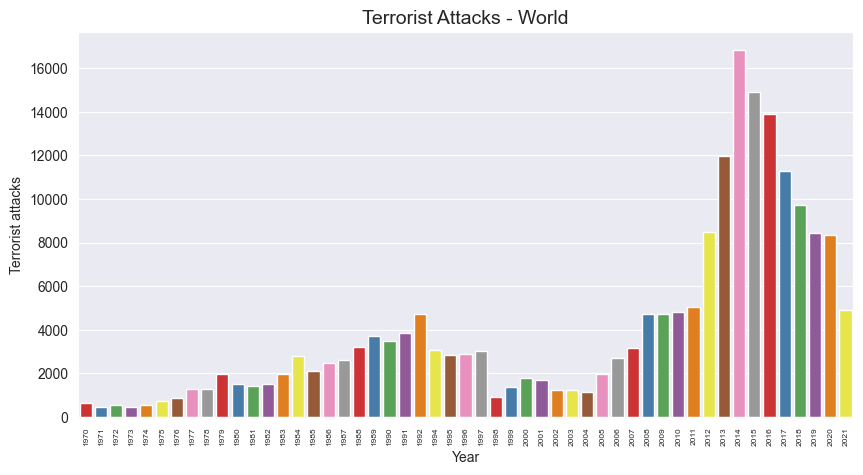

In [10]:
# Terrorist attacks - World
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_world, x = 'Year', y = 'Terrorist attacks', palette = 'Set1')
plt.title("Terrorist Attacks - World", fontsize = 14)
plt.xticks(rotation=90, fontsize = 6)
plt.show()

In [11]:
options = ['Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America', 'Central America & Caribbean']
  
cont_df = df.loc[df['Entity'].isin(options)]
cont_df.head()

,Entity,Code,Year,Terrorist attacks
51,Africa,NaN,1970,4
52,Africa,NaN,1971,3
53,Africa,NaN,1972,2
54,Africa,NaN,1973,5
55,Africa,NaN,1974,7


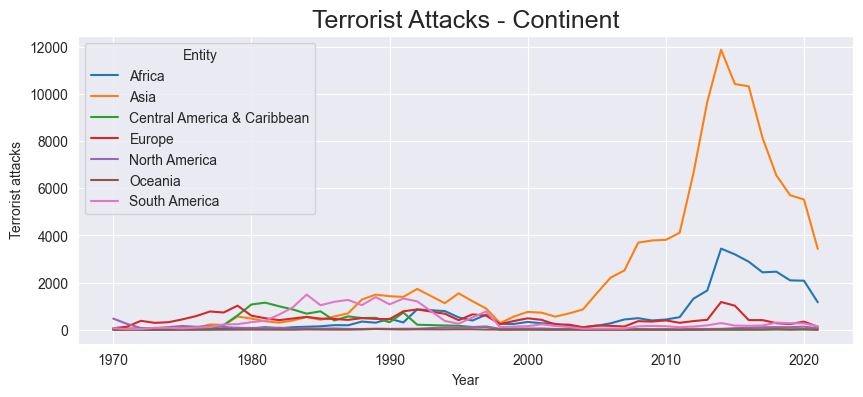

In [12]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data=cont_df, x="Year", y="Terrorist attacks", hue="Entity")
plt.title("Terrorist Attacks - Continent", fontsize = 18) 
plt.show()

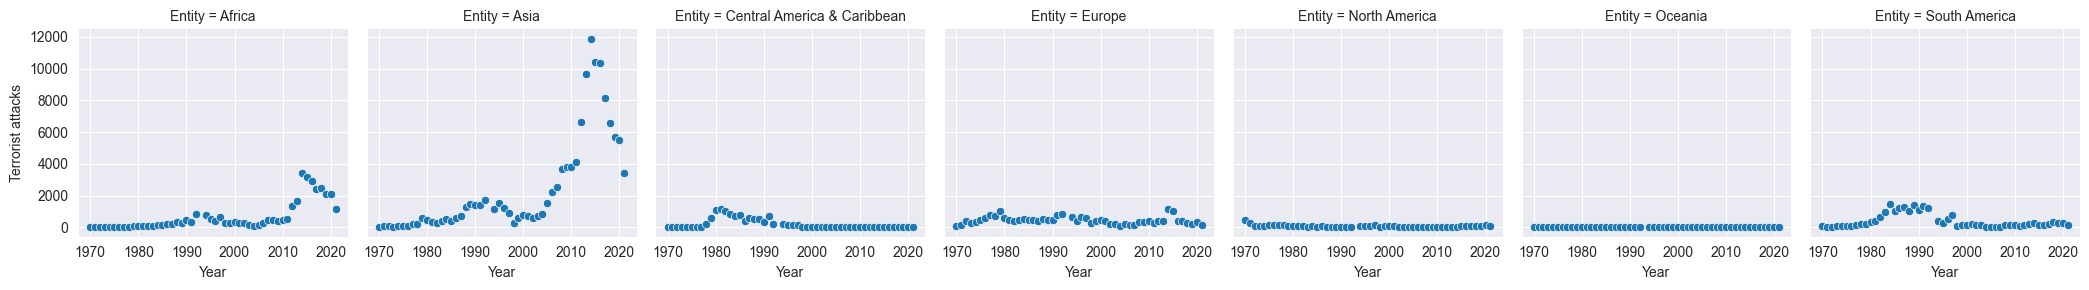

In [13]:
face_grid = sns.FacetGrid(cont_df, col="Entity")
face_grid.map(sns.scatterplot, "Year", "Terrorist attacks")
plt.show()

In [14]:
df_country = df.dropna()
df_country = df_country[(df_country['Entity']!='World')]
df_country

,Entity,Code,Year,Terrorist attacks
0,Afghanistan,AFG,1970,0
1,Afghanistan,AFG,1971,0
2,Afghanistan,AFG,1972,0
3,Afghanistan,AFG,1973,1
4,Afghanistan,AFG,1974,0
...,...,...,...,...
10512,Zimbabwe,ZWE,2017,3
10513,Zimbabwe,ZWE,2018,2
10514,Zimbabwe,ZWE,2019,2
10515,Zimbabwe,ZWE,2020,1


In [15]:
df_country = df.dropna()
df_country = df_country[(df_country['Entity']!='World')]
df_country

,Entity,Code,Year,Terrorist attacks
0,Afghanistan,AFG,1970,0
1,Afghanistan,AFG,1971,0
2,Afghanistan,AFG,1972,0
3,Afghanistan,AFG,1973,1
4,Afghanistan,AFG,1974,0
...,...,...,...,...
10512,Zimbabwe,ZWE,2017,3
10513,Zimbabwe,ZWE,2018,2
10514,Zimbabwe,ZWE,2019,2
10515,Zimbabwe,ZWE,2020,1


In [42]:
char_bar = df_country.groupby(['Entity'])[['Terrorist attacks']].sum().reset_index()
char_bar = char_bar.sort_values(by=("Terrorist attacks"), ascending=False)

top = char_bar.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=top['Entity'], y=top["Terrorist attacks"]))

fig.update_layout(title='Highest Countries According to Total of Terrorist attacks',
                          xaxis_title='Entity',
                          yaxis_title= "Terrorist attacks",
                          plot_bgcolor='#F0EEED', 
                          paper_bgcolor='#F0EEED',  
                          font=dict(color='black'))

pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

In [17]:
char_bar = df_country.groupby(['Entity'])[['Terrorist attacks']].sum().reset_index()
char_bar = char_bar.sort_values(by=("Terrorist attacks"), ascending=True)

top = char_bar.head(10)
fig = go.Figure()
fig.add_trace(go.Bar(x=top['Entity'], y=top["Terrorist attacks"]))

fig.update_layout(title='Lowest Countries According to Total of Terrorist attacks',
                          xaxis_title='Entity',
                          yaxis_title= "Terrorist attacks",
                          plot_bgcolor='#F0EEED', 
                          paper_bgcolor='#F0EEED',  
                          font=dict(color='black'))

pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

In [18]:
fig = px.choropleth(df_country,
                    locations='Entity', locationmode='country names',
                    color = 'Terrorist attacks',hover_name="Entity",
                    animation_frame="Year",
                    color_continuous_scale='Viridis_r')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0}, coloraxis_colorbar=dict(
    title = 'Terrorist attacks',
    ticks = 'outside',
    tickvals = [0,100,200,400,600,800,1000,1500,2000,3000],
    dtick = 12))              
fig.show()


Data_Preprocessing

In [19]:
import numpy as np
import pandas as pd

import dtale

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
import pandas as pd
import dtale
# Assuming the file path is correct
dataset = pd.read_csv('C:/Users/23376066/PycharmProjects/Epic3/datasets/clean/terrorist-attacks new.csv')
dtale.show(dataset)

In [21]:
X = dataset.iloc[:, :-1].values

Y = dataset.iloc[:, -1].values

dtale.show(X)

In [22]:
dtale.show(dataset)
X = dataset.iloc[:, :-1].values

Y = dataset.iloc[:, -1].values

dtale.show(Y)

In [23]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(X[:, 1:])
X[:, 1:] = imputer.transform(X[:, 1:])

In [24]:
dtale.show(X)

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelEncoder_X = LabelEncoder()
X[:, 0] = labelEncoder_X.fit_transform(X[:, 0])

ct = ColumnTransformer([("Entity", OneHotEncoder(sparse_output=False), [0])], remainder="passthrough")
X = ct.fit_transform(X)

labelEncoder_Y = LabelEncoder()
Y = labelEncoder_Y.fit_transform(Y)


In [26]:
dtale.show(X)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test contain both categorical and numerical features
# You need to separate them before applying the scaler

# Select numerical columns
numerical_columns = [1, 2, 3]  # Replace with the indices of your numerical columns

# Apply StandardScaler only to the numerical features
sc_X = StandardScaler()
X_train[:, numerical_columns] = sc_X.fit_transform(X_train[:, numerical_columns])
X_test[:, numerical_columns] = sc_X.transform(X_test[:, numerical_columns])


In [29]:
dtale.show(X_train)

LogisticRegression

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load the dataset
dataset = pd.read_csv('C:/Users/23376066/PycharmProjects/Epic3/datasets/clean/terrorist-attacks new.csv')

# Initialize LabelEncoder for categorical columns
label_encoder_entity = LabelEncoder()
label_encoder_code = LabelEncoder()

# Apply LabelEncoder to convert categorical variables into numerical values
dataset['Entity'] = label_encoder_entity.fit_transform(dataset['Entity'])
dataset['Code'] = label_encoder_code.fit_transform(dataset['Code'])

# 3. Split the data into training and testing sets
X = dataset.drop(columns=['Terrorist attacks'])  # Replace 'target_column' with the name of your target column
Y = dataset['Terrorist attacks']  # Replace 'target_column' with the name of your target column

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 4. Apply logistic regression
# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train, Y_train)

# Predict on the testing data
Y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5289923954372624


Visualisation

Shape of the dataset: (10517, 4)

First few rows of the dataset:
         Entity Code  Year  Terrorist attacks
0  Afghanistan  AFG  1970                  0
1  Afghanistan  AFG  1971                  0
2  Afghanistan  AFG  1972                  0
3  Afghanistan  AFG  1973                  1
4  Afghanistan  AFG  1974                  0

Summary statistics of numerical columns:
                Year  Terrorist attacks
count  10517.000000       10517.000000
mean    1996.226871          76.825711
std       15.089465         532.336065
min     1970.000000           0.000000
25%     1983.000000           0.000000
50%     1997.000000           0.000000
75%     2009.000000           6.000000
max     2021.000000       16820.000000


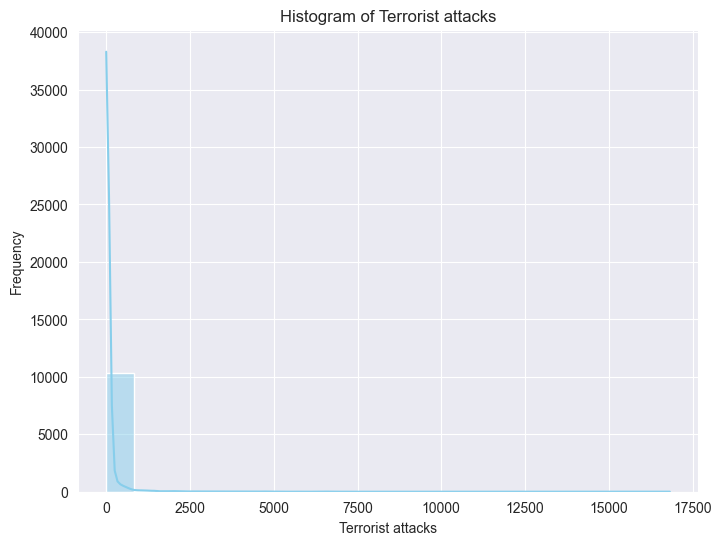

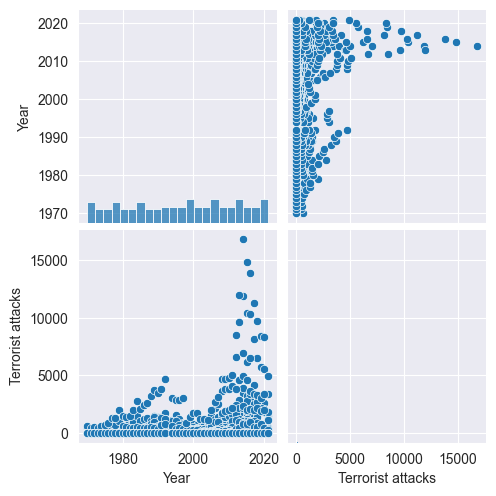

In [31]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = pd.read_csv('C:/Users/23376066/PycharmProjects/Epic3/datasets/clean/terrorist-attacks new.csv')

# Basic data exploration
print("Shape of the dataset:", dataset.shape)
print("\nFirst few rows of the dataset:\n", dataset.head())
print("\nSummary statistics of numerical columns:\n", dataset.describe())

# Visualization
# Histogram of 'Terrorist attacks' column
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Terrorist attacks'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Terrorist attacks')
plt.xlabel('Terrorist attacks')
plt.ylabel('Frequency')
plt.show()

# Pairplot for numerical columns
sns.pairplot(dataset)
plt.show()


naive_bayes

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [33]:
#Import dataset
df = pd.read_csv('C:/Users/23376066/PycharmProjects/Epic3/datasets/clean/terrorist-attacks new.csv')

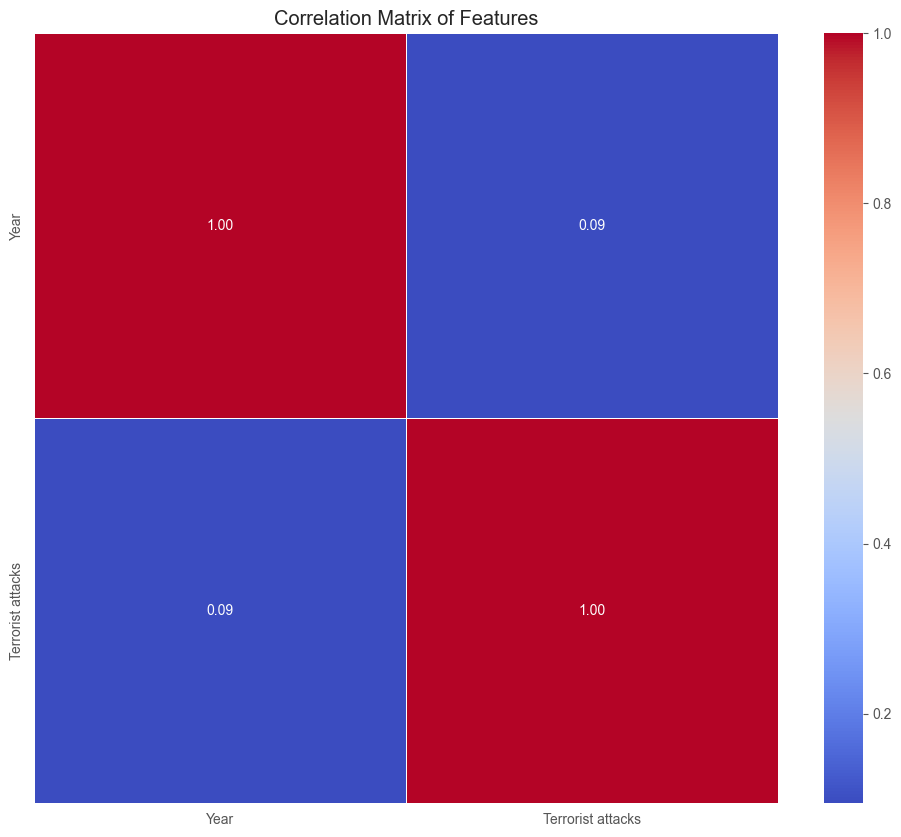

In [34]:
# Assuming df is your DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64']) # Select only numeric columns

correlation_matrix = numeric_df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


In [35]:
# Preprocess data
# Here we are dropping unrelated features, and features that are related to each other, as Naive Bayes assumes feature independence.
X = df.drop(columns=['Entity', 'Code'])
y = df['Terrorist attacks']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

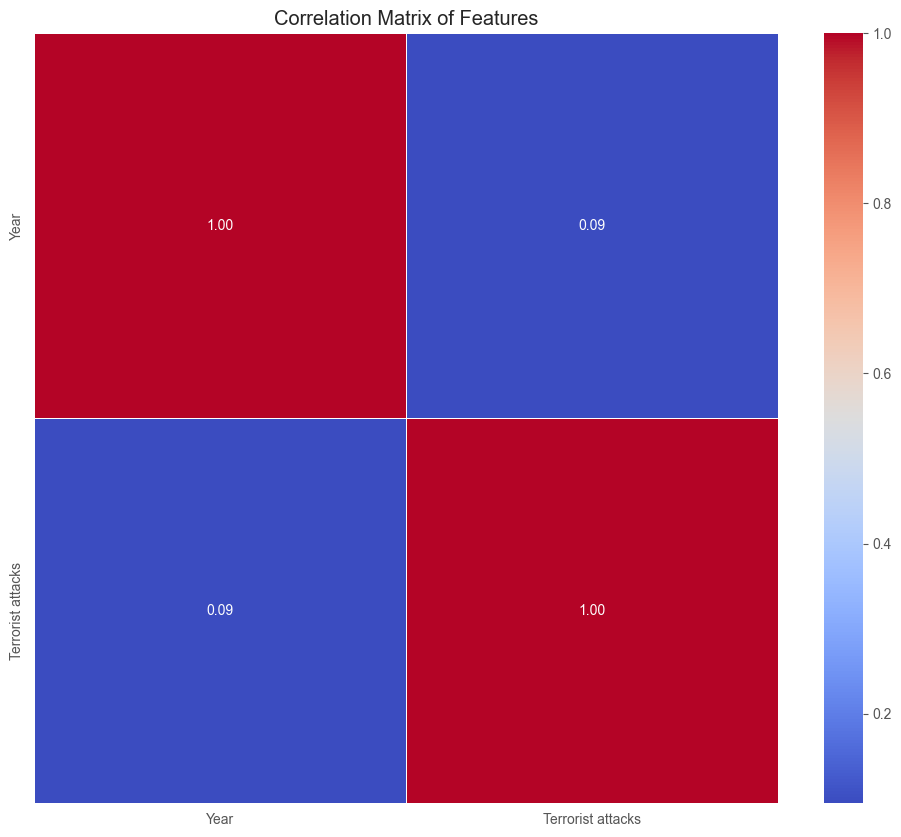

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your terrorist attack data from CSV
terrorist_df = pd.read_csv('C:/Users/23376066/PycharmProjects/Epic3/datasets/clean/terrorist-attacks new.csv')

# Drop non-numeric columns if any
numeric_terrorist_df = terrorist_df.select_dtypes(include=['float64', 'int64'])

# Reset index if needed
numeric_terrorist_df.reset_index(drop=True, inplace=True)

# Compute correlation matrix
correlation_matrix = numeric_terrorist_df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


In [37]:
#Remove outliers using Z-Scores
mean = X.mean()
std = X.std()

lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

cleaned_X = X[(X >= lower_bound) & (X <= upper_bound)]

In [38]:
#Encode and Split dataset
X_encoded = pd.get_dummies(X, drop_first=True)
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y, test_size=0.1, random_state=42)

In [39]:
#Initialize and fit Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_encoded, y_train_encoded)

GaussianNB()

In [40]:
#Prediction
y_pred_encoded = naive_bayes.predict(X_test_encoded)

In [41]:
#Display Results
accuracy_encoded = accuracy_score(y_test_encoded, y_pred_encoded)
print("Accuracy (with one-hot encoding):", accuracy_encoded)
print(classification_report(y_test_encoded, y_pred_encoded))

Accuracy (with one-hot encoding): 0.9429657794676806
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       562
           1       1.00      1.00      1.00       103
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         6
          16       1.00     